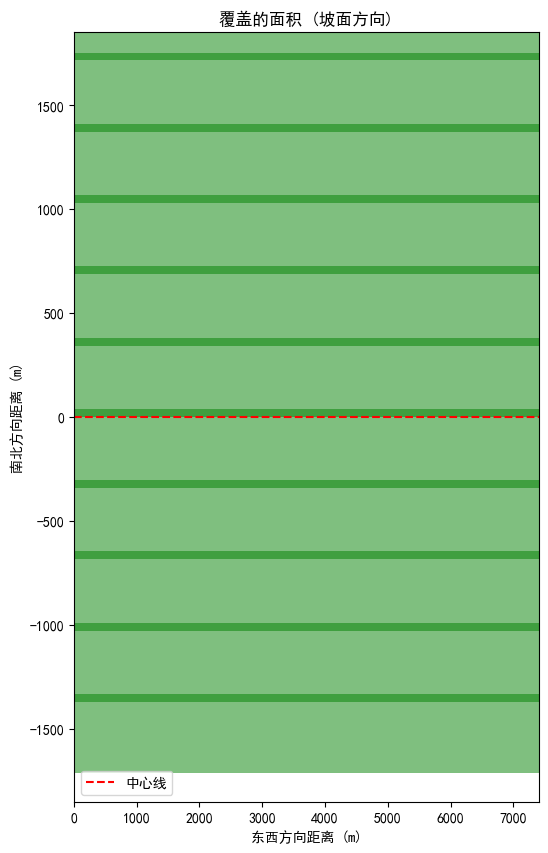

,测线起始位置 (m),测线结束位置 (m),测距 (m),覆盖面积 (m^2),测线数量
0,-1714.142704,-1333.222103,380.920601,2.821860e+06,11
1,-1371.314163,-990.393562,380.920601,2.821860e+06,11
2,-1028.485623,-647.565022,380.920601,2.821860e+06,11
3,-685.657082,-304.736481,380.920601,2.821860e+06,11
4,-342.828541,38.092060,380.920601,2.821860e+06,11
5,0.000000,380.920601,380.920601,2.821860e+06,11
6,342.828541,723.749142,380.920601,2.821860e+06,11
7,685.657082,1066.577683,380.920601,2.821860e+06,11
8,1028.485623,1409.406223,380.920601,2.821860e+06,11
9,1371.314163,1752.234764,380.920601,2.821860e+06,11


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Given parameters
theta = 120  # in degrees
alpha = 1.5  # in degrees
D_center = 110  # in meters
width_rect = 4 * 1852  # 4 nautical miles to meters
overlap_rate = 0.10
length_rect = 2 * 1852  # 2 nautical miles to meters

def calculate_W_prime(D, alpha, theta):
    return 2 * (D * np.cos(np.radians(alpha))) * np.tan(np.radians(theta / 2))

# Function to calculate D' based on X for beta=0 (down the slope) and beta=180 (up the slope)
def calculate_D_prime_slope(X, alpha):
    # As the slope is from west to east, moving towards east (positive X) will decrease the depth
    return D_center - X * np.tan(np.radians(alpha))

# Function to calculate the movement distance for the slope scenario based on W' and overlap rate
def calculate_movement_distance_slope(W_prime, overlap_rate):
    return W_prime * (1 - overlap_rate)

# Calculate W' at the center point
W_prime_center_slope = calculate_W_prime(D_center, alpha, theta)

# Calculate movement distance for the slope scenario
movement_distance_slope = calculate_movement_distance_slope(W_prime_center_slope, overlap_rate)

# Calculate the number of lines needed on one side of the center
num_lines_one_side_slope = int(np.ceil((length_rect / 2) / movement_distance_slope))

# Total number of lines needed for the slope scenario
total_lines_slope = 2 * num_lines_one_side_slope - 1  # minus 1 as the center line is counted twice

# Calculate the starting position for the first line (from the center point) for the slope scenario
start_position_slope = -movement_distance_slope * (num_lines_one_side_slope - 1)

# List to store the covered areas for the slope scenario
covered_areas_slope = []

# Calculate the covered area for each line for the slope scenario
for i in range(total_lines_slope):
    y_start = start_position_slope + i * movement_distance_slope
    y_end = y_start + W_prime_center_slope
    covered_areas_slope.append((y_start, y_end))

# Visualization for the slope scenario
fig, ax = plt.subplots(figsize=(6, 10))
ax.set_xlim(0, width_rect)
ax.set_ylim(-length_rect / 2, length_rect / 2)
ax.set_title("覆盖的面积 (坡面方向)")
ax.set_xlabel("东西方向距离 (m)")
ax.set_ylabel("南北方向距离 (m)")
ax.axhline(0, color='r', linestyle='--', label="中心线")  # center line

# Plot the covered areas for the slope scenario
for area in covered_areas_slope:
    rect = patches.Rectangle((0, area[0]), width_rect, area[1] - area[0], facecolor='green', alpha=0.5)
    ax.add_patch(rect)

ax.legend()
plt.show()

# Create a table with the results for the slope scenario
df_results_slope = pd.DataFrame({
    "测线起始位置 (m)": [area[0] for area in covered_areas_slope],
    "测线结束位置 (m)": [area[1] for area in covered_areas_slope],
    "测距 (m)": [W_prime_center_slope for _ in covered_areas_slope],
    "覆盖面积 (m^2)": [width_rect * (area[1] - area[0]) for area in covered_areas_slope]
})
df_results_slope["测线数量"] = total_lines_slope

# Create a table with the results for the slope scenario
df_results_slope = pd.DataFrame({
    "测线起始位置 (m)": [area[0] for area in covered_areas_slope],
    "测线结束位置 (m)": [area[1] for area in covered_areas_slope],
    "测距 (m)": [W_prime_center_slope for _ in covered_areas_slope],
    "覆盖面积 (m^2)": [width_rect * (area[1] - area[0]) for area in covered_areas_slope]
})
df_results_slope["测线数量"] = total_lines_slope

df_results_slope

